## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [1268]:
# reading the dataset
house = pd.read_csv("train.csv")

In [1269]:
# summary of the dataset
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1270]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploring the Data

In [1271]:
house.shape

(1460, 81)

In [1272]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1273]:
numeric = house.select_dtypes(include=['float64', 'int64'])

In [1274]:
numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Step 2: Data Preparation

In [1275]:
# To print the percentage of all the columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(round((house.isnull().sum() * 100 /len(house)),2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

NA in FirePlaceQu means No fire place. So let us replace it with No

In [1276]:
# Making 'select' values to Null
house["FireplaceQu"].replace(np.nan,'No', inplace=True)

In [1277]:
house["FireplaceQu"].value_counts()

No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1278]:
house["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

NA in Alley means No access to Alley. So let us replace it with No

In [1279]:
# Making NA value to No
house["Alley"].replace(np.nan,'No', inplace=True)

In [1280]:
house["Alley"].value_counts()

No      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

NA in PoolQC means No Pool. So let us replace it with No

In [1281]:
# Making NA value to No
house["PoolQC"].replace(np.nan,'No', inplace=True)

In [1282]:
house["PoolQC"].value_counts()

No    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64

Since most of the houses do not have a pool. Only 7 out of 1460 have pool. So we can delete the column PoolQC and PoolArea

NA in Fence means No Fence. So let us replace it with No

In [1283]:
# Making NA value to No
house["Fence"].replace(np.nan,'No', inplace=True)

In [1284]:
house["Fence"].value_counts()

No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

NA in MiscFeature means No Feature. So let us replace it with No

In [1285]:
# Making NA value to No
house["MiscFeature"].replace(np.nan,'No', inplace=True)

In [1286]:
house["MiscFeature"].value_counts()

No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

NA in GarageType,GarageFinish,GarageQual and GarageCond  means No Garage. So let us replace it with No

In [1287]:
col=["GarageType","GarageFinish","GarageQual","GarageCond"]

In [1288]:
# Making NA value to No
for x in col:
    house[x].replace(np.nan,'No', inplace=True)

In [1289]:
#GarageYrBlt is mostly same as YearBuilt. so we can delete this col

In [1290]:
house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1291]:
house["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1292]:
house["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Replace C (all) with C

In [1293]:
house["MSZoning"].replace("C (all)","C", inplace=True)

In [1294]:
house["MSZoning"].value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

In [1295]:
house["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 means No Basement. So let us replace it with No

In [1296]:
col=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

In [1297]:
# Making NA value to No
for x in col:
    house[x].replace(np.nan,'No', inplace=True)

In [1298]:
house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: BsmtQual, dtype: int64

In [1299]:
# Dropping columns having all unique values and the columns having one value in majority
# of rows.
house.drop(['Id','PoolQC','PoolArea',"Utilities","Street","GarageYrBlt"], axis=1, inplace=True)

In [1300]:
# To print the count of nulls of all the columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(round(house.isnull().sum()*100/len(house),2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea  

LotFrontage has around 17% NULL values. Lets explore this column.

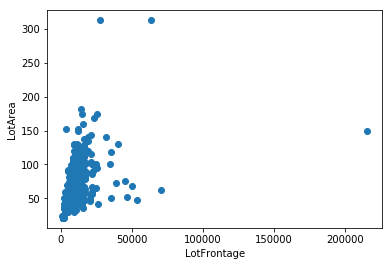

In [1301]:
plt.scatter(house['LotArea'], house['LotFrontage'])
plt.xlabel('LotFrontage')
plt.ylabel('LotArea')
plt.show()

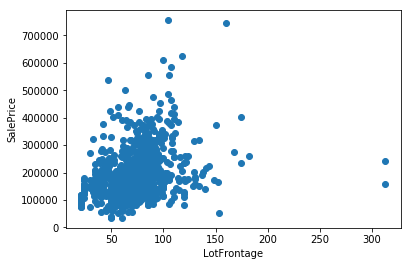

In [1302]:
plt.scatter(house['LotFrontage'], house['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

There seem to be some correlation of LotFrontage with the SalePrice. So cannot delete the column. LotFontage has around 17% null values. This col may be useful for analysis, so deleting the rows having null values.

In [1303]:
house.dropna(inplace=True)

In [1304]:
# To print the count of nulls of all the columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(round(house.isnull().sum()*100/len(house),2))

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

### Now the data is clean for further analysis

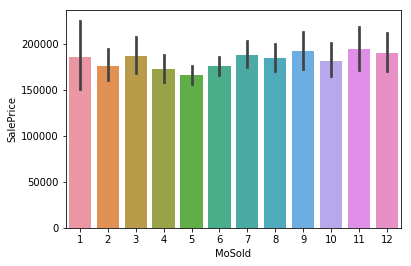

In [1305]:
sns.barplot(x="MoSold", y="SalePrice", data=house)

In [1306]:
#There is not much effect of the Month of Selling on the Price. So we can delete the col MoSold
house = house.drop(['MoSold'], 1)

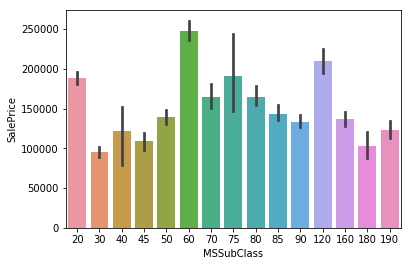

In [1307]:
# Plot MSSubClass with Price
sns.barplot(x="MSSubClass", y="SalePrice", data=house)

In [1308]:
#convert MSSubClass from numeric to categorical 
house["MSSubClass"] = house["MSSubClass"].astype('category')

### Outlier Analysis

In [1309]:
# Let us do outlier detection
house.iloc[:,:40].describe(percentiles = [0.01,0.05,0.10,.25,0.5,0.75,0.90,0.95,0.99])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,70.027638,9953.743719,6.115578,5.564489,1970.376884,1985.069514,102.789782,426.108878,43.227806,589.352596,1058.689280
std,24.299302,7944.707633,1.416597,1.096949,31.731221,21.199868,185.458287,463.935324,154.910871,448.947579,447.997343
min,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1680.000000,3.000000,3.000000,1892.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,34.000000,3213.200000,4.000000,4.000000,1915.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,520.000000
10%,44.000000,5000.000000,5.000000,5.000000,1922.000000,1950.000000,0.000000,0.000000,0.000000,80.000000,630.000000
25%,59.000000,7416.250000,5.000000,5.000000,1950.000000,1965.000000,0.000000,0.000000,0.000000,245.000000,784.000000
50%,69.000000,9248.500000,6.000000,5.000000,1972.000000,1995.000000,0.000000,351.500000,0.000000,506.000000,989.000000
75%,80.000000,11248.750000,7.000000,6.000000,2003.000000,2004.000000,160.000000,689.750000,0.000000,833.000000,1308.250000


In [1310]:
# Let us do outlier detection
house.iloc[:,40:70].describe(percentiles = [0.01,0.05,0.10,.25,0.5,0.75,0.90,0.95,0.99])

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,1157.985762,346.103853,6.659966,1510.749581,0.409548,0.054439,1.565327,0.367672,2.865997,1.051926,6.537688,0.573702,1.762144,471.870184,89.547739,45.623116,22.864322,3.144054,15.116415,25.639866
std,386.087173,435.338817,51.504538,530.846519,0.518502,0.234246,0.551918,0.499448,0.809913,0.233025,1.631830,0.629010,0.779262,221.474456,120.540943,65.792317,61.815791,28.858432,56.138262,190.328558
min,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,518.250000,0.000000,0.000000,669.060000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,672.000000,0.000000,0.000000,839.300000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,747.000000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.000000,0.000000,0.000000,1131.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1081.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000
75%,1383.000000,727.750000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,578.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000


In [1311]:
# Let us do outlier detection
house.iloc[:,70:].describe(percentiles = [0.01,0.05,0.10,.25,0.5,0.75,0.90,0.95,0.99])

,YrSold,SalePrice
count,1194.000000,1194.000000
mean,2007.803183,180454.855109
std,1.332660,83205.442060
min,2006.000000,34900.000000
1%,2006.000000,60000.000000
5%,2006.000000,86650.000000
10%,2006.000000,103060.000000
25%,2007.000000,127500.000000
50%,2008.000000,159000.000000
75%,2009.000000,213497.500000


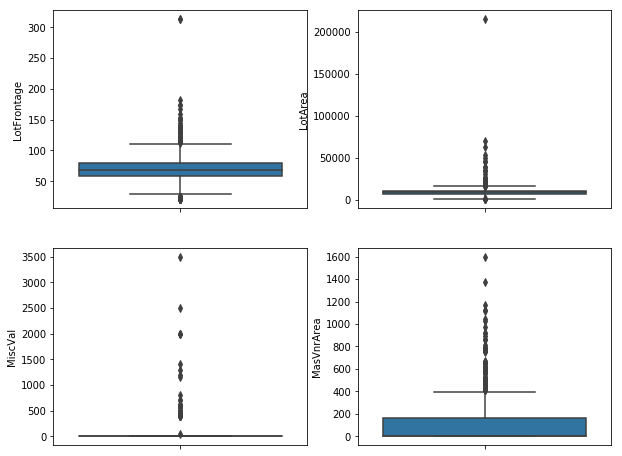

In [1312]:
# Boxplot for some component to identify outliers
r,c=2,2
plt.figure(figsize=(10,8))

plt.subplot(r,c,1)
sns.boxplot(x = house.LotFrontage , orient='v')

plt.subplot(r,c,2)
sns.boxplot(x = house.LotArea , orient='v')

plt.subplot(r,c,3)
sns.boxplot(x = house.MiscVal , orient='v')

plt.subplot(r,c,4)
sns.boxplot(x = house.MasVnrArea , orient='v')

plt.show()

In [1313]:
house.shape

(1194, 74)

Some of the columns contain utliers. So we need to remove them.

In [1314]:
#columns containing outliers
col_outliers = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
                "2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                "3SsnPorch","ScreenPorch","MiscVal"]

In [1315]:
for x in col_outliers:
    quant=house[x].quantile(.99)
    house=house.loc[(house[x] <= quant)]

In [1316]:
house.shape

(992, 74)

we are left with around 68% of the data.

### Deived Metrics
There are some Year related columns. We need to convert them into numeric one.

In [1317]:
house['Age']=house['YrSold']-house["YearBuilt"]
house['AgeRemod'] = house['YrSold']-house["YearRemodAdd"]
#delete the Years cols
house=house.drop(["YearBuilt", "YearRemodAdd", "YrSold"], axis=1)

In [1318]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age,AgeRemod
0,60,RL,65.0,8450,No,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,No,No,0,WD,Normal,208500,5,5
1,20,RL,80.0,9600,No,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,No,No,0,WD,Normal,181500,31,31
2,60,RL,68.0,11250,No,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,No,No,0,WD,Normal,223500,7,6
4,60,RL,84.0,14260,No,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,No,No,0,WD,Normal,250000,8,8
6,20,RL,75.0,10084,No,Reg,Lvl,Inside,Gtl,Somerst,...,0,0,No,No,0,WD,Normal,307000,3,2


In [1319]:
# split into X and y
y = house.pop("SalePrice")
X = house

### Scaling of numerical columns

In [1320]:
# all numeric (float and int) variables in the dataset
numeric = X.select_dtypes(include=['float64', 'int64'])
numeric.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,Age,AgeRemod
count,992.000000,992.000000,992.000000,992.000000,992.00000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,66.922379,8976.210685,5.943548,5.573589,79.94254,385.986895,32.574597,571.153226,989.714718,1089.139113,...,1.682460,445.142137,78.745968,38.880040,21.056452,0.705645,10.555444,8.370968,37.881048,23.741935
std,19.672111,3387.117301,1.299242,1.095182,135.98737,391.367033,116.444148,424.749759,358.339919,310.639146,...,0.738842,200.189806,102.393919,52.159392,55.375307,9.725394,41.503030,62.012201,31.176364,21.457299
min,21.000000,1300.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,7200.000000,5.000000,5.000000,0.00000,0.000000,0.000000,243.250000,768.000000,864.000000,...,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000
50%,66.000000,8991.500000,6.000000,5.000000,0.00000,335.000000,0.000000,497.000000,943.500000,1041.500000,...,2.000000,460.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,37.000000,14.000000
75%,79.000000,10695.500000,7.000000,6.000000,125.50000,659.250000,0.000000,811.000000,1214.250000,1301.000000,...,2.000000,570.000000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,58.000000,44.000000
max,140.000000,25286.000000,10.000000,9.000000,788.00000,1513.000000,712.000000,1795.000000,1856.000000,1872.000000,...,4.000000,924.000000,431.000000,243.000000,252.000000,153.000000,260.000000,600.000000,136.000000,60.000000


In [1321]:
# Importing libraries for Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = list(numeric.columns)
X[col] = scaler.fit_transform(X[col])

In [1322]:
house.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,Age,AgeRemod
count,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,...,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02
mean,9.624917e-18,-6.966873e-17,9.485720e-17,3.682090e-16,2.941196e-16,2.160011e-17,-1.734723e-17,5.685416e-17,2.308301e-18,-1.574122e-16,...,8.136413e-17,-9.906110e-17,-2.918812e-16,1.202380e-16,1.835449e-17,1.728008e-16,-9.803986e-17,-1.620567e-16,-4.487898e-17,7.498482e-18
std,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,...,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00
min,-2.335567e+00,-2.267439e+00,-3.806866e+00,-3.264656e+00,-5.881639e-01,-9.867504e-01,-2.798855e-01,-1.345360e+00,-2.763337e+00,-2.432147e+00,...,-2.278306e+00,-2.224722e+00,-7.694372e-01,-7.457842e-01,-3.804416e-01,-7.259357e-02,-2.544578e-01,-1.350571e-01,-1.215670e+00,-1.107032e+00
25%,-5.046425e-01,-5.246664e-01,-7.265960e-01,-5.240026e-01,-5.881639e-01,-9.867504e-01,-2.798855e-01,-7.723810e-01,-6.190395e-01,-7.251265e-01,...,-9.241539e-01,-7.253883e-01,-7.694372e-01,-7.457842e-01,-3.804416e-01,-7.259357e-02,-2.544578e-01,-1.350571e-01,-9.910272e-01,-9.205210e-01
50%,-4.691130e-02,4.516238e-03,4.347155e-02,-5.240026e-01,-5.881639e-01,-1.303447e-01,-2.798855e-01,-1.746690e-01,-1.290340e-01,-1.534357e-01,...,4.299978e-01,7.425632e-02,-7.694372e-01,-3.621508e-01,-3.804416e-01,-7.259357e-02,-2.544578e-01,-1.350571e-01,-2.827439e-02,-4.542440e-01
75%,6.142560e-01,5.078527e-01,8.135391e-01,3.895485e-01,3.351814e-01,6.985794e-01,-2.798855e-01,5.649627e-01,6.269146e-01,6.823601e-01,...,4.299978e-01,6.240120e-01,6.962325e-01,4.051162e-01,-3.804416e-01,-7.259357e-02,-2.544578e-01,-1.350571e-01,6.456526e-01,9.445869e-01
max,3.716657e+00,4.817671e+00,3.123742e+00,3.130202e+00,5.209415e+00,2.881136e+00,5.837718e+00,2.882789e+00,2.418715e+00,2.521433e+00,...,3.138301e+00,2.393226e+00,3.441920e+00,3.915362e+00,4.172619e+00,1.566735e+01,6.013305e+00,9.545339e+00,3.148810e+00,1.690630e+00


In [1323]:
# creating dummy variables for categorical variables

# subset all categorical variables
categorical = X.select_dtypes(include=['object','category'])
categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,No,Attchd,RFn,TA,TA,Y,No,No,WD,Normal
1,20,RL,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal
2,60,RL,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal
4,60,RL,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,No,No,WD,Normal
6,20,RL,No,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,Y,No,No,WD,Normal


In [1324]:
# convert into dummies
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1325]:
# drop categorical variables 
X = X.drop(list(categorical.columns), axis=1)

In [1326]:
# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)

In [1327]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.097770,-0.155435,0.813539,-0.524003,0.853873,0.818093,-0.279885,-0.992033,-0.373339,-0.750893,...,0,0,0,0,1,0,0,0,1,0
1,0.665115,0.184258,0.043472,2.216651,-0.588164,1.513443,-0.279885,-0.676394,0.760235,0.556749,...,0,0,0,0,1,0,0,0,1,0
2,0.054807,0.671644,0.813539,-0.524003,0.603724,0.255677,-0.279885,-0.323066,-0.194647,-0.544762,...,0,0,0,0,1,0,0,0,1,0
4,0.868551,1.560753,1.583607,-0.524003,1.986903,0.687715,-0.279885,-0.191158,0.433565,0.179916,...,0,0,0,0,1,0,0,0,1,0
6,0.410820,0.327225,1.583607,-0.524003,0.780300,2.513009,-0.279885,-0.598662,1.944066,1.948132,...,0,0,0,0,1,0,0,0,1,0


### Looking at the correlations

In [1328]:
cor = X.corr()
# The generation of heatmap takes a lot of time and the values are not readable.

In [1329]:
# Selecting only columns having correlation more than 0.80
rows, cols = X.shape
col = list(X.columns)

corr = cor.values

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] >= 0.8:
            print(col[i], ' ', col[j], ' ', corr[i,j])

2ndFlrSF   HouseStyle_2Story   0.8443279453944597
GrLivArea   TotRmsAbvGrd   0.8179525033855933
GarageCars   GarageArea   0.8922568275575087
MiscVal   MiscFeature_Shed   0.941533255467734
MSSubClass_45   HouseStyle_1.5Unf   0.9602786094927097
MSSubClass_75   HouseStyle_2.5Unf   0.8655874642349046
MSSubClass_80   HouseStyle_SLvl   0.916984116578357
MSSubClass_90   BldgType_Duplex   1.0
MSSubClass_190   BldgType_2fmCon   0.9765051973872378
MSZoning_FV   Neighborhood_Somerst   0.8467806590135247
Exterior1st_CBlock   Exterior2nd_CBlock   1.0
Exterior1st_CemntBd   Exterior2nd_CmentBd   1.0
Exterior1st_HdBoard   Exterior2nd_HdBoard   0.886016740164084
Exterior1st_MetalSd   Exterior2nd_MetalSd   0.9704493898957887
Exterior1st_VinylSd   Exterior2nd_VinylSd   0.9764685443152544
Exterior1st_Wd Sdng   Exterior2nd_Wd Sdng   0.8889911637688792
BsmtQual_No   BsmtCond_No   1.0
BsmtQual_No   BsmtFinType1_No   1.0
BsmtQual_No   BsmtFinType2_No   1.0
BsmtCond_No   BsmtFinType1_No   1.0
BsmtCond_No   Bsm

In [1330]:
#Delete the highly correlated columns
X = X.drop(["HouseStyle_2Story","TotRmsAbvGrd","GarageArea","MiscFeature_Shed","MSSubClass_45",
            "MSSubClass_75","MSSubClass_80", "MSSubClass_90", "MSSubClass_190",
            "Neighborhood_Somerst","Exterior2nd_CBlock","Exterior2nd_CmentBd",
            "Exterior2nd_HdBoard","Exterior2nd_MetalSd","Exterior2nd_VinylSd",
            "Exterior2nd_Wd Sdng","BsmtCond_No","BsmtFinType1_No","BsmtFinType2_No",
            "Electrical_Mix","GarageFinish_No","GarageQual_No","GarageCond_No",
            "SaleCondition_Partial"], axis=1)

#X = X.drop(["GrLivArea","1stFlrSF","MSSubClass_60","MSSubClass_120","Neighborhood_NPkVill",
#                    "Exterior2nd_Plywood","Exterior2nd_Stucco","BsmtQual_No","GarageCond_Po","GarageCond_TA"],axis=1)

In [1331]:
X.shape

(992, 221)

In [1332]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Lasso Regression

In [1333]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   19.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1334]:
#The optimum value of alpha
model_cv.best_params_

{'alpha': 100}

In [1335]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158810,0.008455,0.000998,0.000312,0.0001,{'alpha': 0.0001},-17456.874177,-13666.836233,-15039.401899,-18080.221243,...,-15802.841467,1682.895758,27,-8931.196099,-9510.596965,-9735.422110,-9019.065195,-9271.397576,-9293.535589,299.831063
1,0.160310,0.003943,0.000701,0.000245,0.001,{'alpha': 0.001},-17454.350697,-13666.780890,-15039.158742,-18079.820461,...,-15799.240985,1684.160815,26,-8931.217267,-9510.598175,-9735.422412,-9019.078193,-9271.403164,-9293.543842,299.823750
2,0.156722,0.004664,0.000702,0.000401,0.01,{'alpha': 0.01},-17429.115284,-13666.229035,-15036.727493,-18076.052504,...,-15763.284802,1697.869874,25,-8931.580721,-9510.697786,-9735.527578,-9019.292224,-9271.599613,-9293.739584,299.739242
3,0.157844,0.005543,0.000900,0.000200,0.05,{'alpha': 0.05},-17320.638635,-13663.769784,-15025.923417,-18061.993465,...,-15724.826382,1682.361124,24,-8933.192516,-9511.145143,-9736.057971,-9020.243401,-9272.570041,-9294.641815,299.382418
4,0.152605,0.008984,0.000502,0.000449,0.1,{'alpha': 0.1},-17305.342252,-13660.684834,-15012.423598,-18048.152077,...,-15708.592344,1682.486963,23,-8935.203108,-9511.901072,-9736.719391,-9021.513497,-9273.836604,-9295.834734,298.949886


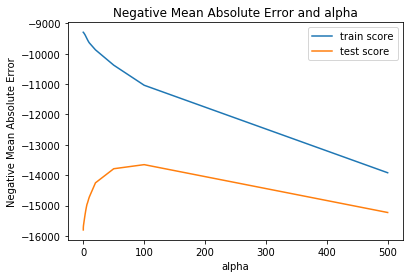

In [1336]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1337]:
#Perform lasso with optimum value of alpha
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1338]:
lasso.coef_

array([ 1.38151234e+03,  2.24401723e+03,  1.29306819e+04,  4.62915154e+03,
        9.65634741e+02,  8.21495358e+03,  6.79146681e+02, -0.00000000e+00,
        5.49649067e+03,  4.86206678e+02,  0.00000000e+00, -1.12691303e+03,
        1.72779908e+04,  7.34055510e+02, -7.93751117e+02,  3.31887054e+03,
        1.34735975e+03, -1.57608525e+03, -3.77036221e+03,  3.12314121e+02,
        4.95702722e+03,  2.50790755e+03,  1.97251138e+03,  3.28657700e+02,
        2.90496875e+03,  6.64664585e+02,  2.27690671e+02, -9.44587318e+03,
       -2.63551071e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.54908637e+03, -0.00000000e+00, -3.68704199e+03,
       -1.53497185e+04,  0.00000000e+00,  1.19204827e+04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.04033396e+03,  6.46661108e+03,
       -3.25160083e+02,  0.00000000e+00,  8.82049949e+03, -0.00000000e+00,
       -0.00000000e+00, -

In [1339]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
param_list = list(zip(cols, model_parameters))

In [1340]:
lasso_df = pd.DataFrame(param_list, columns=['Feature','Coeff'])

In [1341]:
lasso_df.head()

,Feature,Coeff
0,constant,167809.22
1,LotFrontage,1381.51
2,LotArea,2244.02
3,OverallQual,12930.68
4,OverallCond,4629.15


In [1342]:
lasso_df_nonzero = lasso_df.loc[(lasso_df["Coeff"] != 0.0)]

In [1343]:
lasso_df_nonzero.shape

(94, 2)

In [1344]:
lasso_df_nonzero.head()

,Feature,Coeff
0,constant,167809.22
1,LotFrontage,1381.51
2,LotArea,2244.02
3,OverallQual,12930.68
4,OverallCond,4629.15


In [1345]:
cols_nzero=list(lasso_df_nonzero['Feature'])

In [1346]:
cols_nzero.remove('constant')

In [1347]:
y_train_pred = lasso.predict(X_train)

Text(0.5,0,'Errors')

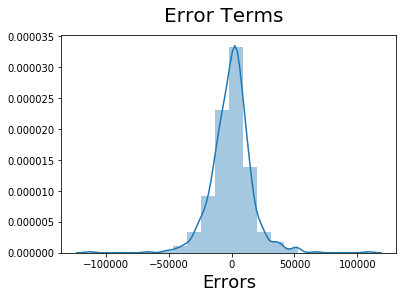

In [1348]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1349]:
# Making predictions on the test set
y_test_pred = lasso.predict(X_test)

Text(0,0.5,'y_pred')

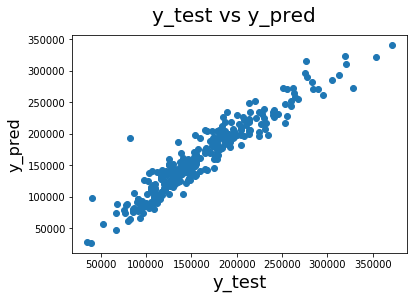

In [1350]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Model Evaluation

In [1351]:
#for train, check the Rsquare
from sklearn.metrics import r2_score
train_r_square = r2_score(y_train, y_train_pred)
train_r_square

0.934421402657122

In [1352]:
#no. of data points
n = len(X_test)

In [1353]:
#Find Residual Sum of Square errors
resid = y_test - y_test_pred
sse = sum(resid**2)

#k is the no. of variables in the regression equation which means the no of non zero 
# coefficients. Subtracting 1 as the df contains const also
k = len(lasso_df_nonzero) -1

#find AIC
AIC = 2*k + 2*np.log(sse/n)

In [1354]:
AIC

225.1325602699049

In [1355]:
k

93

In [1356]:
#find BIC
BIC = n*np.log(sse/n) + k*np.log(n)

In [1357]:
BIC

6360.58117446083

In [1358]:
#Compute R-Squared for test
TSS = sum((y_test - np.mean(y_test))**2)
r_square= 1- (float(sse))/TSS
r_square

0.9015176585269482

In [1359]:
#Compute Adjusted R-Squared
Adjusted_r_square = 1- (1-r_square) * (n-1)/(n-k-1)
Adjusted_r_square

0.8566212969730569

In [1360]:
lasso_df_nonzero.sort_values(["Coeff"],ascending=False).head(10)

,Feature,Coeff
0,constant,167809.22
77,Neighborhood_StoneBr,36853.67
71,Neighborhood_NoRidge,18862.77
13,GrLivArea,17277.99
62,Neighborhood_Crawfor,16938.33
72,Neighborhood_NridgHt,16447.69
215,SaleType_New,13275.68
3,OverallQual,12930.68
39,MSZoning_FV,11920.48
130,MasVnrType_Stone,10049.11


In [1361]:
lasso_df_nonzero.sort_values(["Coeff"],ascending=True).head(10)

,Feature,Coeff
143,BsmtQual_Gd,-15720.06
37,MSSubClass_160,-15349.72
145,BsmtQual_TA,-11483.35
92,BldgType_Twnhs,-11048.72
67,Neighborhood_Mitchel,-9554.25
28,Age,-9445.87
175,KitchenQual_Gd,-9350.32
73,Neighborhood_OldTown,-9000.03
142,BsmtQual_Fa,-7830.58
176,KitchenQual_TA,-7572.03


## Ridge Regression

In [1362]:
# Applying ridge regression only on the parameters selected by Lasso

In [1363]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[cols_nzero], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1364]:
#Best value of alpha
model_cv.best_params_

{'alpha': 3.0}

In [1365]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035425,0.064095,0.000697,2.417692e-04,0.0001,{'alpha': 0.0001},-14918.949493,-12200.372170,-11518.069199,-15159.011735,...,-13167.194820,1548.440388,23,-10359.363169,-10840.180012,-11244.074159,-10350.407898,-10953.400729,-10749.485193,348.104359
1,0.003602,0.000800,0.000701,2.447777e-04,0.001,{'alpha': 0.001},-14918.710685,-12200.295056,-11517.908279,-15158.289670,...,-13166.882516,1548.297168,22,-10359.321515,-10840.078498,-11243.976736,-10350.389100,-10953.305970,-10749.414364,348.073930
2,0.003302,0.000510,0.000600,2.004623e-04,0.01,{'alpha': 0.01},-14916.329414,-12199.527325,-11516.300190,-15151.096199,...,-13163.768920,1546.872651,21,-10358.903747,-10839.064504,-11243.006147,-10350.210948,-10952.359940,-10748.709057,347.768982
3,0.003002,0.000316,0.000500,4.156970e-07,0.05,{'alpha': 0.05},-14905.892621,-12196.186551,-11509.178412,-15119.708092,...,-13150.133800,1540.705838,20,-10357.022285,-10834.583378,-11238.841090,-10349.531340,-10948.189480,-10745.633515,346.442010
4,0.003103,0.000734,0.000400,2.002010e-04,0.1,{'alpha': 0.1},-14893.169542,-12192.159929,-11500.337260,-15082.568753,...,-13133.700819,1533.563790,19,-10354.622670,-10829.160037,-11233.831034,-10348.755677,-10943.352505,-10741.944385,344.888315


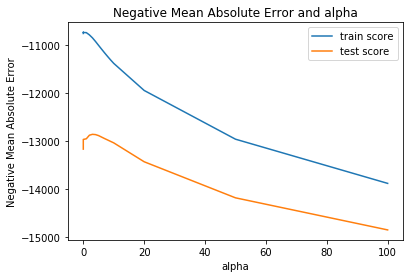

In [1366]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1367]:
#Perform Ridge on the best value of alpha
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[cols_nzero], y_train)
ridge.coef_

array([  1466.9867184 ,   2476.47480704,  12091.36030323,   4606.07904592,
         1141.61467369,   7903.01414116,   1051.46255323,   5060.41233389,
         1405.20875105,  -1203.13170625,  16860.84141285,    900.64522491,
         -666.57688613,   4121.28547123,   1868.73309195,  -2121.62642443,
        -3276.60268853,   -761.92401171,   4254.58046249,   2317.29388549,
         1993.93328918,    500.09295884,   2810.01356351,    831.80854153,
          410.91917901,  -9613.44376883,  -2305.94313395,   5122.25612526,
        -4516.92145172, -14733.00476582,  12974.00972257,   2117.71253294,
         8679.3010694 ,  -5958.26397857,  11092.69808918,   3235.64870321,
        -8925.80210108,  15706.47468516,  -7225.28428694,  -8195.4077793 ,
       -11885.33699166,  -3083.70687189,  -6840.8219089 ,  20408.47951245,
        15713.43397283, -11142.65721729,  32358.15558194,   3959.79627864,
         8547.92361922,  -8439.91214193, -13678.68683374,  -6787.14881511,
         1489.84853934,  

In [1368]:
#making Predictions on the train set
y_train_pred = ridge.predict(X_train[cols_nzero])

Text(0.5,0,'Errors')

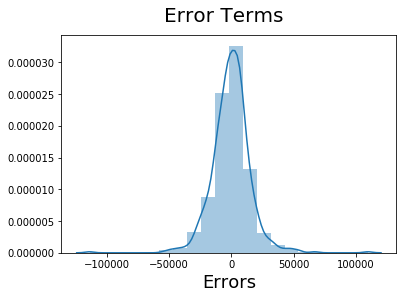

In [1369]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1370]:
# Making predictions on the test set
y_test_pred = ridge.predict(X_test[cols_nzero])

Text(0,0.5,'y_pred')

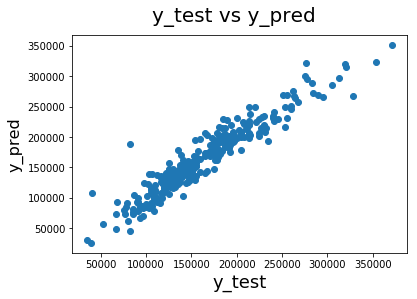

In [1371]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [1372]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
param_list = list(zip(cols, model_parameters))

In [1373]:
#Convert it into a Dataframe
ridge_df = pd.DataFrame(param_list, columns=['Feature','Coeff'])

In [1374]:
ridge_df.head()

,Feature,Coeff
0,constant,170207.04
1,LotFrontage,1466.99
2,LotArea,2476.47
3,OverallQual,12091.36
4,OverallCond,4606.08


#### Model Evaluation

In [1375]:
#for train, check the Rsquare
from sklearn.metrics import r2_score
train_r_square = r2_score(y_train, y_train_pred)
train_r_square

0.938819907143341

In [1376]:
# Num of data points
n = len(X_test)

In [1377]:
#Compute the Residual Square Error
resid = y_test - y_test_pred
sse = sum(resid**2)
#k = no of predictors (1 is subtracted as the df contains const also)
k = len(ridge_df)-1

#Calculate AIC
AIC = 2*k + 2*np.log(sse/n)

In [1378]:
AIC

225.12751669256534

In [1379]:
#Calculate BIC
BIC = n*np.log(sse/n) + k*np.log(n)

In [1380]:
BIC

6359.829681437238

In [1381]:
#Find R Squared
TSS = sum((y_test - np.mean(y_test))**2)
r_square= 1- (float(sse))/TSS
r_square

0.9017656972977184

In [1382]:
#can also be computed using the metrics
#from sklearn.metrics import r2_score
#r_square = r2_score(y_test, y_test_pred)

In [1383]:
#Find Adjusted R-Squared
Adjusted_r_square = 1- (1-r_square) * (n-1)/(n-k-1)
Adjusted_r_square

0.8569824122422665

### The top 5 features as given by LASSO affecting the SalePrice of the Property in Australia are -

1. Neighbourhood - If the Neighbourhoods are Stone Brook, North Ridge, Crawford or North Ridge Heights, the Prices are going to be higher.
2. GrLivArea - higher the ground living area square feet, higher is the Price
3. SaleType - If the property is just constructed and sold, the Price is higher
4. OverallQual - Higher the overall quality of the house, higher is the price
5. BsmtQual - If the Basement quality is not Excellent, then the Price are lower

Some other factors for a higher price are :-
MSZoning - Floating Village Residential
MasVnrType - Stone

Some other factors for a lower price are :-
MSSubclass - 160 (2-STORY PUD - 1946 & NEWER)
BldgType - Townhouse Inside Unit
